In [1]:
import numpy as np
import pandas as pd
import math
import scipy
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## The Binomial distribution ##

**Binomial setting:**
1. A fixed number ($n$) of trials
2. The $n$ trials are independent of each other
3. Each trial has exactly two outcomes:  "succes" and "failure"
4. The probability of a success ($p$) is the same for each trial

**Binomial or not? (from the slides)**
- Birthday problem estimation of probabilities.  $X= $ number of simulations out of 1000 with a triplet 
- $X = $ number of stocks on the NY stock exchange which increase in price on November 2, 2021.
- $X = $ number of games Cubs will win next season.
- A couple decides to have children until they have a girl. $X =$ number of boys the couple will have.
- Number of boys among the next 3873 children born in Cook County hospital.

### Roll a dice 10 times and count the number of 6's ###

We can use simulation to approximate this probability distribution. How many simulations should we do?

In [2]:
def dice_sim(n,nsim):
    """Simulates nsim repetions of rolling a dice n times, returns the number of 6's."""
    outcomes = np.array([])
    for i in np.arange(nsim):
        outcomes = np.append(outcomes, sum(np.random.choice(['6','rest'], n, p=[1/6, 5/6])=='6'))
    return outcomes

dice_sim(10,3)

array([2., 3., 0.])

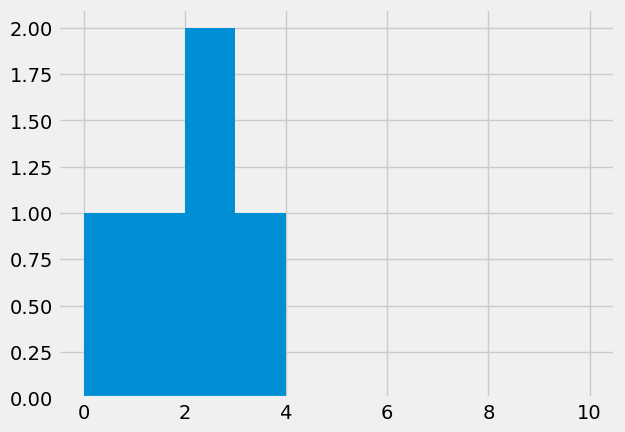

In [3]:
#I will use simulations to see how the sampling distribution changes with nsim. 

# nsim=5,10,50,100,500,100,1000
n=10  #number of rolls
nsim=5
bins = np.arange(0, n+1, 1)

plt.hist(dice_sim(n,nsim), bins)
plt.show()

Obviously, you can write a function that calculates the binomial distribution probabilities

In [4]:
# there is a factorial function in the math package
math.factorial(10)

3628800

In [5]:
def binprob(n,p,k):
    """Calculates the binomial probability P(X=k) for X~Bin(n,p)"""
    return (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))*(p**k)*((1-p)**(n-k))

In [6]:
binprob(10,1/6,3)

0.15504535957425192

## Histograms of various binomial distributions

We are varying n and p. Also shown are:
- the location of the binomial mean (purple dot)
- an interval centered at mean and with half-width equal to two standard deviations (red line)

The data plotted are generated using 10,000 simulations.

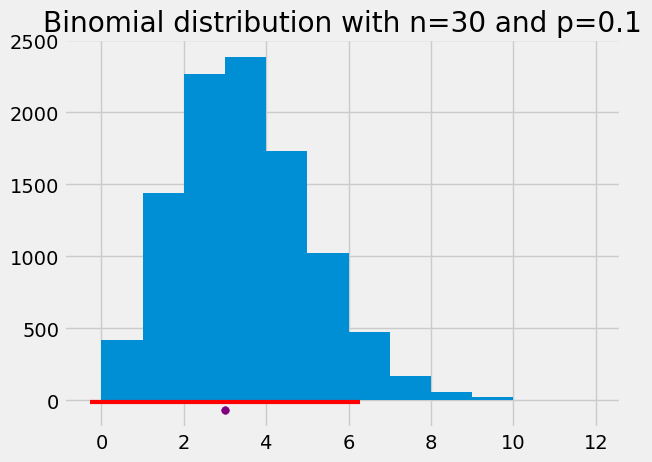

In [7]:
n=30
p=0.1
plt.hist(np.random.binomial(n,p,10000),bins=np.arange(0,13,1))
plt.scatter(n*p, -70, color='purple', s=30, zorder=2);
plt.plot([n*p-2*np.sqrt(n*p*(1-p)), n*p+2*np.sqrt(n*p*(1-p))], [-10, -10], color='red', lw=3, zorder=1)
plt.title("Binomial distribution with n="+str(n)+" and p="+str(p))
plt.show()

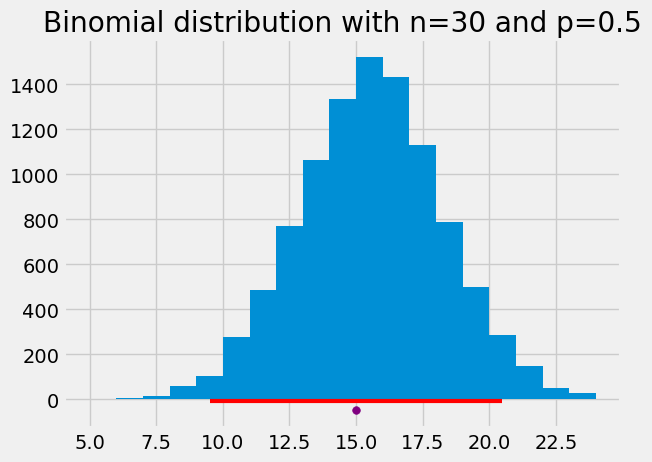

In [8]:
n=30
p=0.5
plt.hist(np.random.binomial(n,p,10000),bins=np.arange(5,25,1))
plt.title("Binomial distribution with n="+str(n)+" and p="+str(p))
plt.scatter(n*p, -50, color='purple', s=30, zorder=2);
plt.plot([n*p-2*np.sqrt(n*p*(1-p)), n*p+2*np.sqrt(n*p*(1-p))], [-10, -10], color='red', lw=3, zorder=1)
plt.show()

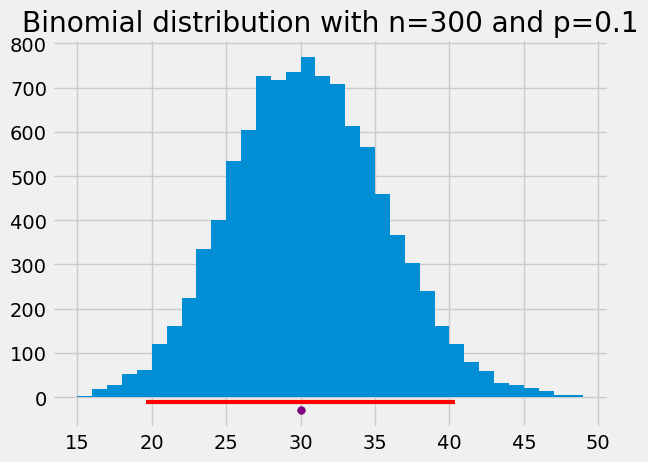

In [9]:
n=300
p=0.1
plt.hist(np.random.binomial(n,p,10000),bins=np.arange(15,50,1))
plt.scatter(n*p, -30, color='purple', s=30, zorder=2);
plt.plot([n*p-2*np.sqrt(n*p*(1-p)), n*p+2*np.sqrt(n*p*(1-p))], [-10, -10], color='red', lw=3, zorder=1)
plt.title("Binomial distribution with n="+str(n)+" and p="+str(p))
plt.show()

### The number of simulations for estimating proportions or probabilities

The slides discuss briefly the analytical argument for determining the number of simulations. Here we do the same with simulations:

- Suppose we want to run simulations to investigate an event (e.g., birthday problem for 23 random subjects)
- Goal: estimate the probability of that event (e.g., p=0.5073)
- Recall that each simulation will yield a "success" or a "failure" (two subjects with the same birthday or not)
- If we perform *nsim* simulations, the number of "successes" comes from the Bin(nsim,p) distribution


In [10]:
nsim=10**6
#p=0.5073
p=0.5

# the estimation of probability when we perform nsim simulations
np.random.binomial(nsim,p,1)/nsim

array([0.500291])

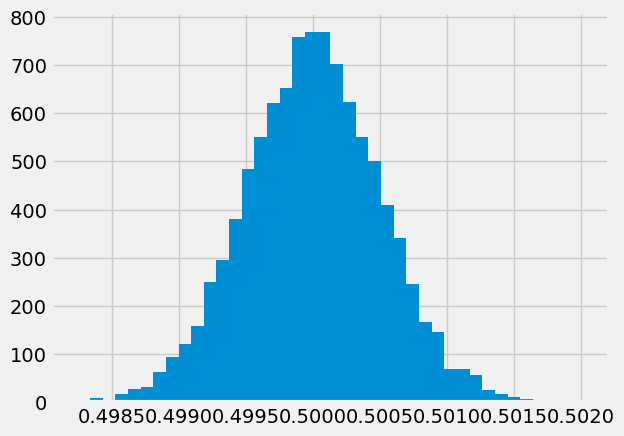

In [11]:
# to explore how much off we are when we do nsim simulations

# What role does reps play?
reps=10000
plt.hist(np.random.binomial(nsim,p,reps)/nsim,bins=40);

## Birth rates - an exploratory data analysis 

**Exploratory Data Analysis:**
- Used for pattern discovery, outliers
- Model assumptions checking 
- Aid in selection of appropriate analytical tools
- Suggest hypotheses about causes of observed phenomena 

**Caution:** data dredging, data fishing, p-hacking (related to multiple comparison/testing).

Recall from previous lectures:

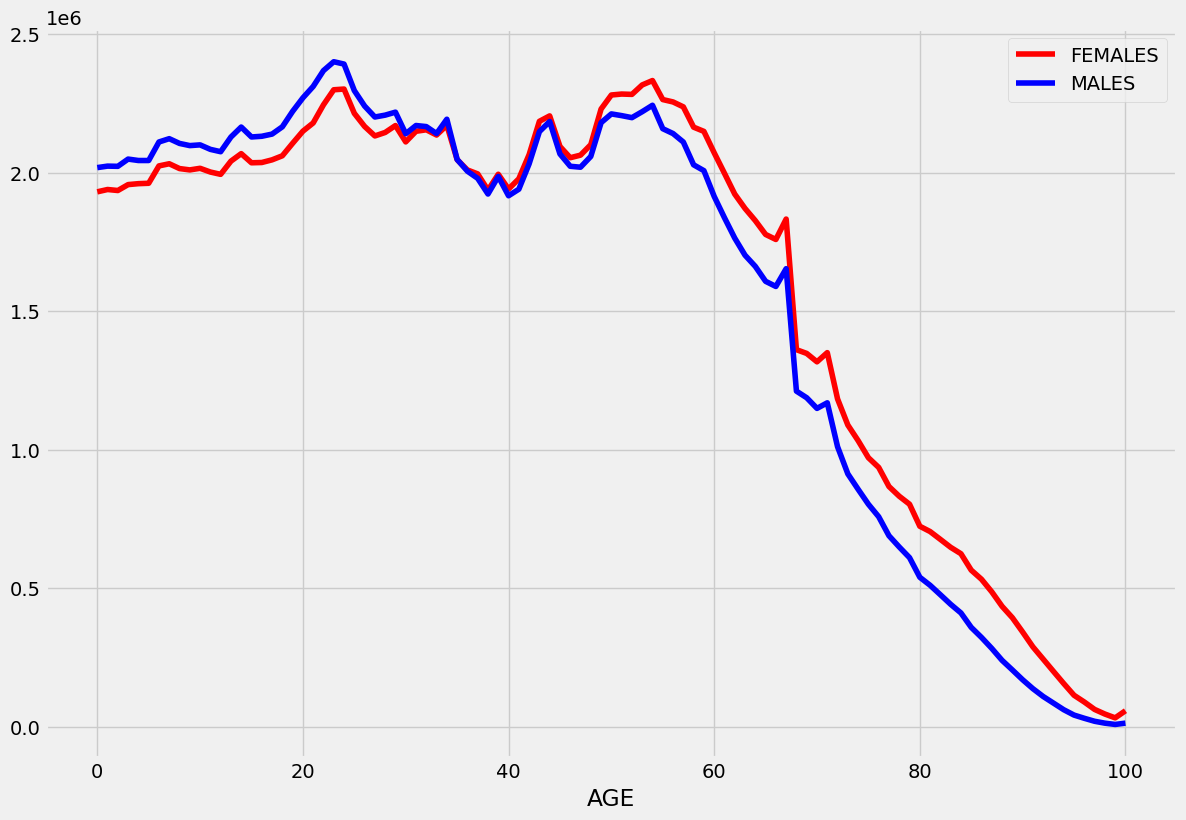

In [12]:
#read census data (available from census.gov)
full = pd.read_csv('data/nc-est2014-agesex-res.csv')

#all the commands that follow are copied from the lecture 4 notebook (part 2)
partial = full[['SEX','AGE','POPESTIMATE2010','POPESTIMATE2014' ]]
simple= partial.rename(columns = {'POPESTIMATE2010':'2010','POPESTIMATE2014':'2014'})
no_999 = simple.query('AGE < 999')
everyone = no_999.query('SEX == 0').drop(columns=['SEX','2010'])
males = no_999.query('SEX == 1').drop(columns=['SEX','2010'])
females = no_999.query('SEX == 2').drop(columns=['SEX','2010'])
males = males.rename(columns = {'2014':'MALES'})
females = females.rename(columns ={'2014':'FEMALES'})
pop_2014 = pd.merge(females,males, on='AGE')
pop_2014.plot('AGE',color=['r','b'],figsize=(13,9));

Some information on US birth rates can be found here:

https://www.prb.org/usrecessionandbirthrate/


## Sex differences at birth and in the general population ##


<br>
<div>
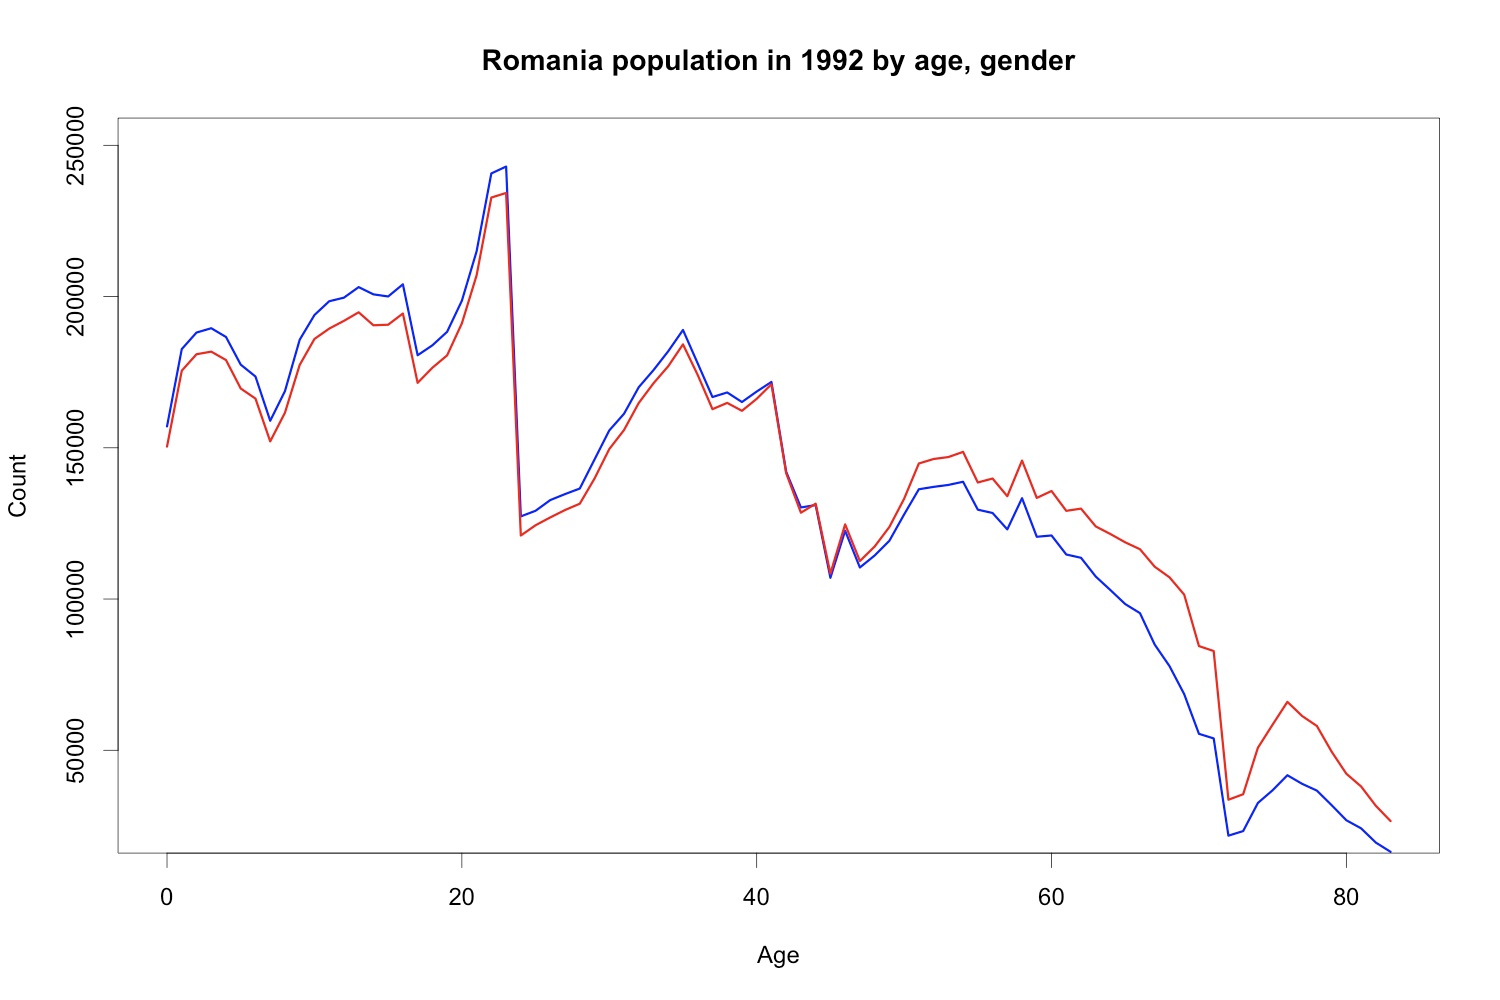
</div>
<br> 


<br>
<div>
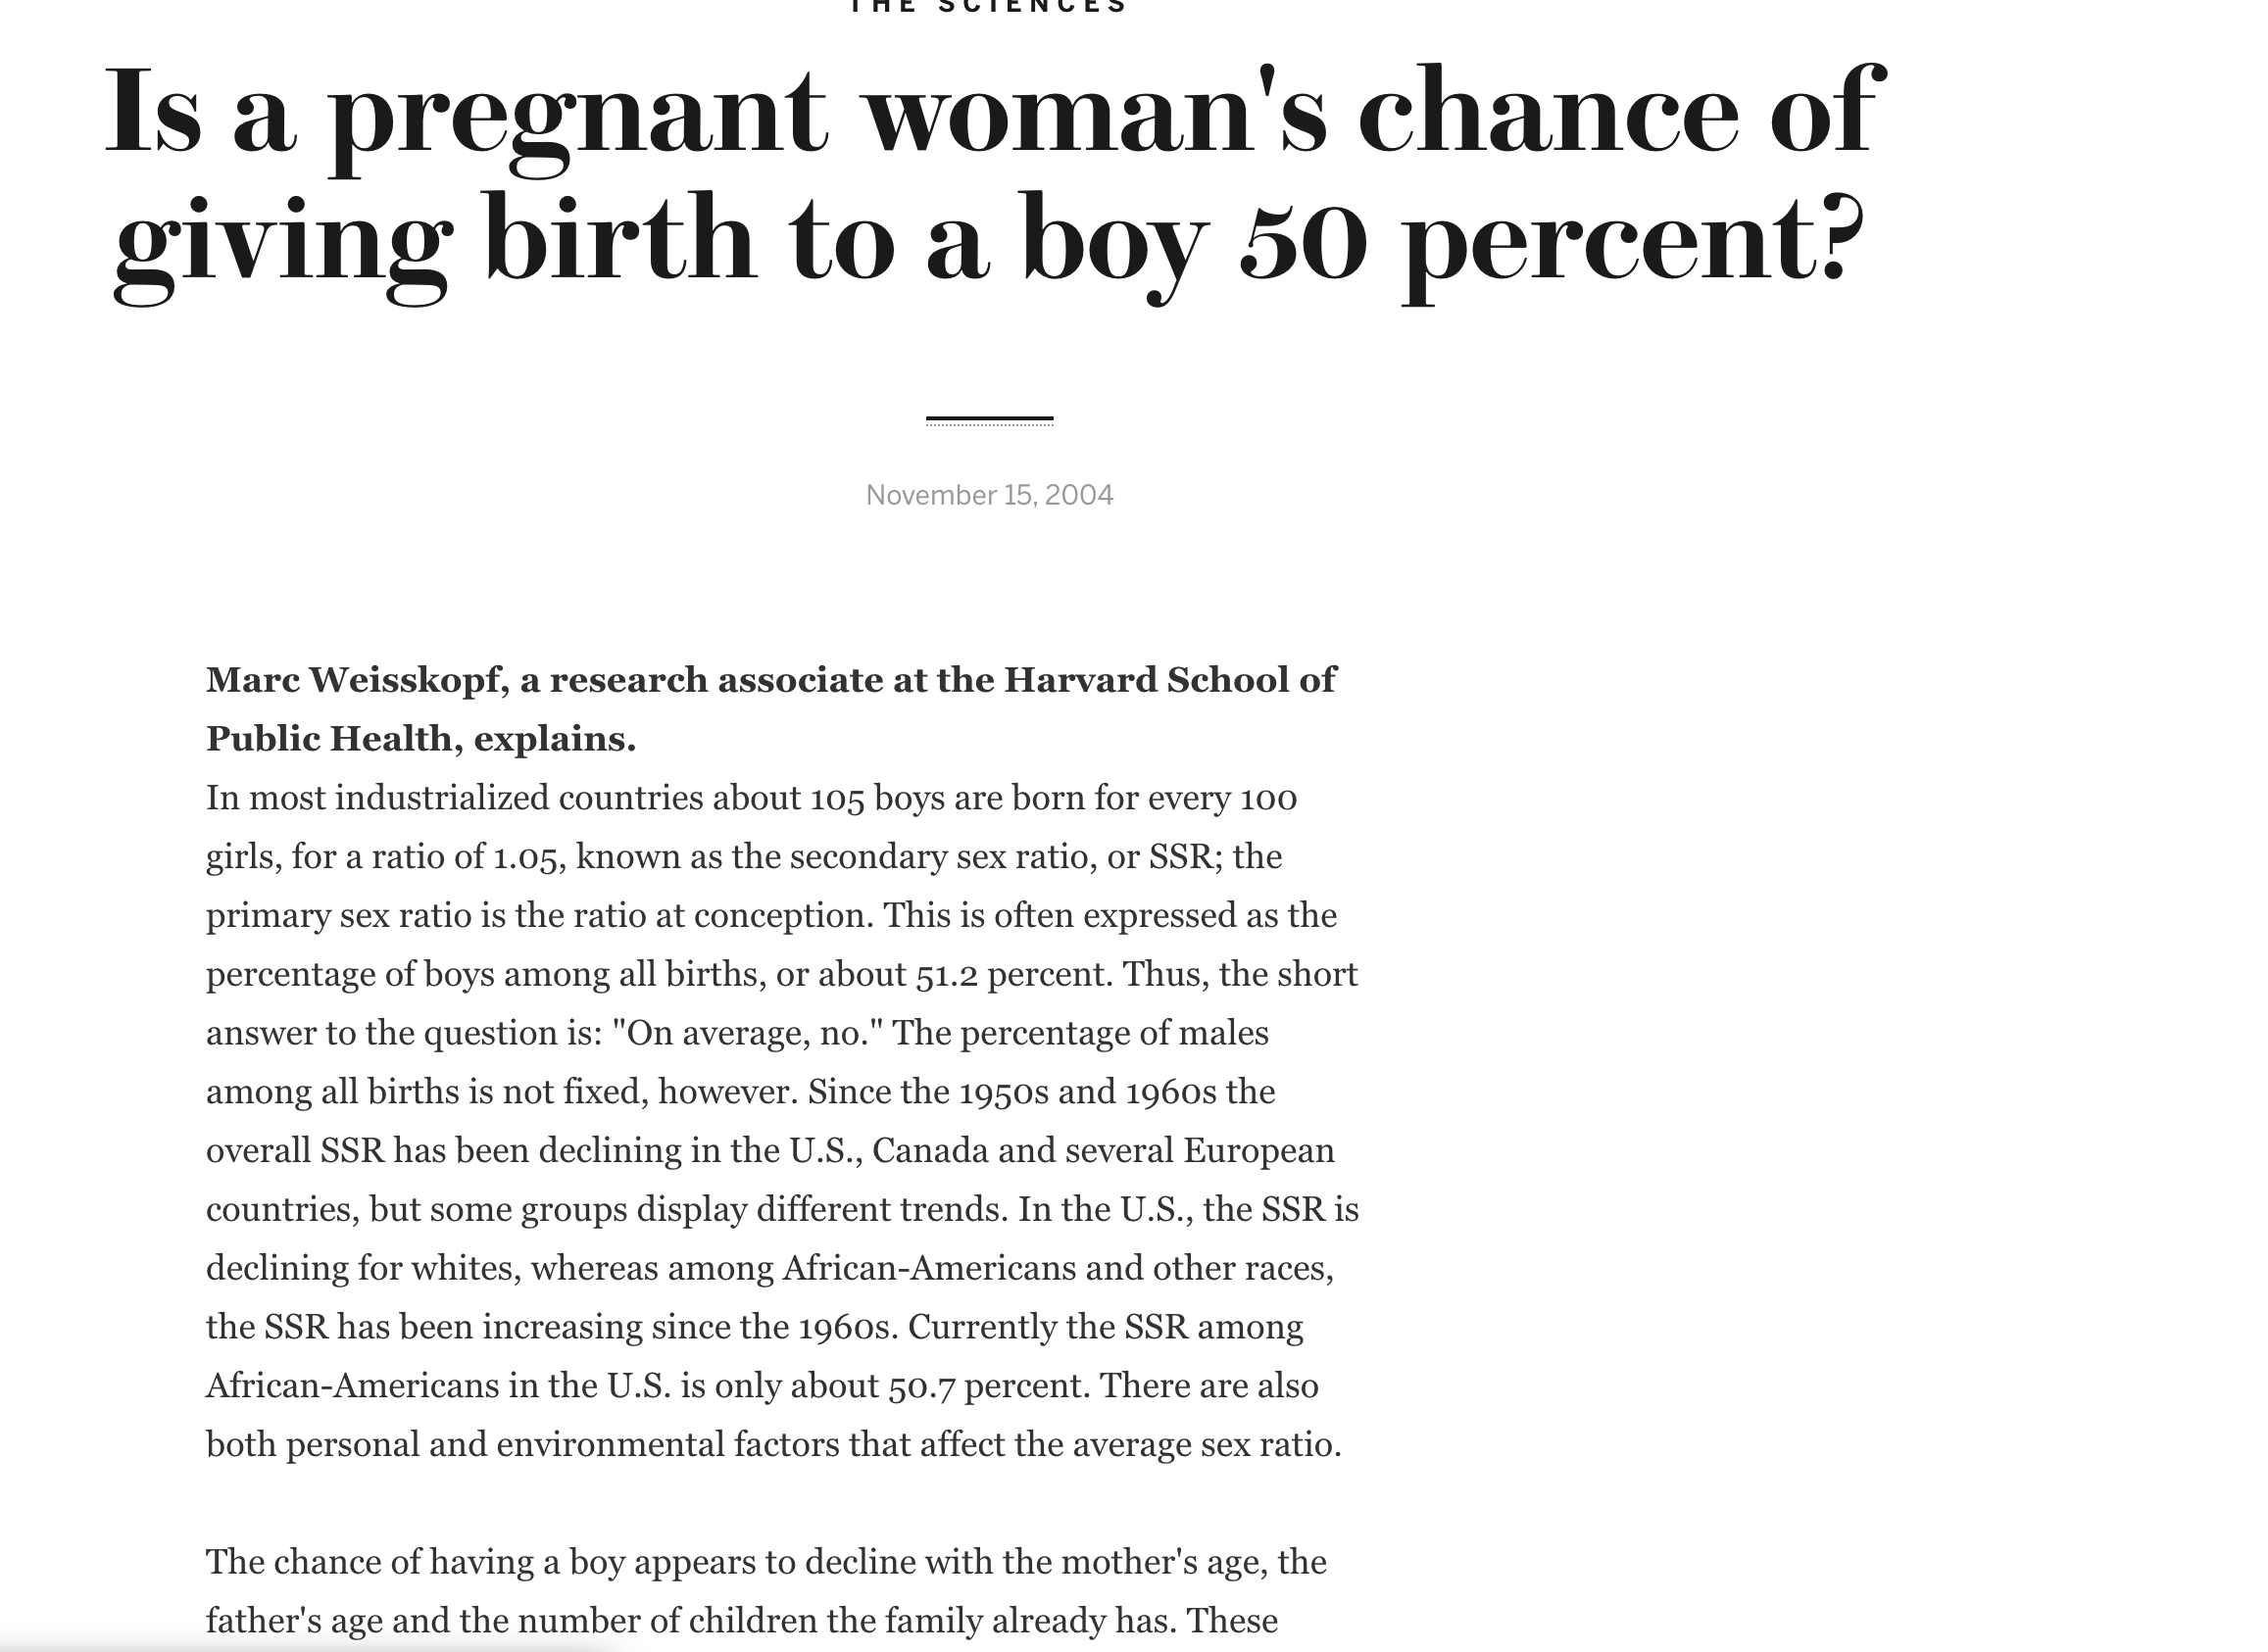
</div>
<br> 


<br>

<br>


## To investigate the secondary sex ratio, we downloaded the breakdown of 2016 births from CDC:

https://wonder.cdc.gov/natality.html



In [13]:
#data from CDC
natality2016=pd.read_csv("data/Natality2016.csv")
natality2016.head(8)

,State,Single.Race,Age.of.Mother.9,Gender.Code,Births
0,Alabama,American Indian or Alaska Native,15-19 years,F,10
1,Alabama,American Indian or Alaska Native,20-24 years,F,24
2,Alabama,American Indian or Alaska Native,20-24 years,M,26
3,Alabama,American Indian or Alaska Native,25-29 years,F,15
4,Alabama,American Indian or Alaska Native,25-29 years,M,19
5,Alabama,American Indian or Alaska Native,30-34 years,F,14
6,Alabama,Asian,20-24 years,F,39
7,Alabama,Asian,20-24 years,M,40


In [14]:
natality2016[['Gender.Code','Births']].groupby('Gender.Code').sum()

,Births
Gender.Code,
F,1925598
M,2016003


In [15]:
# overall SSR
2016003/1925598

1.046949051671221

In [16]:
# recall from Lecture 10
pd.pivot_table(natality2016,index=['Single.Race'],columns=['Gender.Code'],\
               values=['Births'],aggfunc=sum)

Births         
Gender.Code                                      F        M
Single.Race                                                
American Indian or Alaska Native             18278    18653
Asian                                       132702   141704
Black or African American                   307433   315828
More than one race                           46922    49406
Native Hawaiian or Other Pacific Islander     5055     5269
White                                      1415208  1485143

In [17]:
natality2016[(natality2016['State']=='Illinois') & (natality2016['Single.Race']=='White')]

,State,Single.Race,Age.of.Mother.9,Gender.Code,Births
863,Illinois,White,Under 15 years,F,24
864,Illinois,White,Under 15 years,M,17
865,Illinois,White,15-19 years,F,2333
866,Illinois,White,15-19 years,M,2479
867,Illinois,White,20-24 years,F,9015
868,Illinois,White,20-24 years,M,9433
869,Illinois,White,25-29 years,F,15504
870,Illinois,White,25-29 years,M,16239
871,Illinois,White,30-34 years,F,18213
872,Illinois,White,30-34 years,M,19136


In [18]:
# SSR for White mothers over 40 years old
print((1811+121),(1823+107+11))
(1811+121)/(1823+107+11)

1932 1941


0.9953632148377125

## Do we have evidence of decreased SSR in this selected group? ##

We would like to investigate if these data are realistic when SSR=1.05. This is called model assessment:
- the model is: births are sampled independently from a population with SSR=1.05
- assessment: done with simulations here, but also can be done with probabilistic models.


In [19]:
#number of births in that group
print(1811+121,1823+107+11)
(1811+121+1823+107+11)

1932 1941


3873

- The number of boys in 3873 births is a random variable.
- The sample SSR is also a random variable.
- We are interested in their **probability distributions (sampling distributions).**

### Review ###

We will use simulations to do statistical inference. As a consequence it is useful to review functions we can use to simulate random samples. So far we used:
1.  A function defined by us using `np.random.choice()`;
2. `np.random.binomial()`;
3. The `sample` command in `Pandas`

The questions we will answer: 

-  what are the assumptions underlying them?
-  how do they differ in their setup?
-  what kinds of problems is each suited for?

In [20]:
# Simulate number of boys in 3873 births

sum(np.random.choice(["b","g"],size=3873,p=[0.512,0.488])=="b")

2001

In [21]:
# I can also use np.random.binomial for the same simulation

np.random.binomial(3873,0.512,1)

array([1938])

In [22]:
# And I can use pandas for the same simulation
biased_list = ["b"] * 64 + ["g"] * 61  # 64:61 =  512:488 
biased_df = pd.DataFrame(biased_list)
biased_df.sample(3873, replace=True).reset_index()

,index,0
0,100,g
1,109,g
2,29,b
3,12,b
4,59,b
...,...,...
3868,113,g
3869,30,b
3870,86,g
3871,83,g


## Is this significant? 
## How do we articulate our confidence that these two groups' difference is not the result of "sampling randomness" ? 
Recall that in 2016 there were
2016003/1925598  baby boys / baby girls in the US nationwide
but we found a group, white women in illinois over 40, who
had 1932 / 1941   boys / girls in 2016.

To the extent we want to call sex at birth a random process, different samples of this process (different groups, different years) will give different random answers.  Can we convince ourselves that this one 
group is really different?  We have three approaches:

A)  Test the null hypothesis that the SSR is the same as the population  (NHST) against the sample statistic 
B)  Generate bootstrap estimates of a statistic that will have the same variance about the true mean and see how they compare to statistic for the whole population  (Bootstrap method) 
C)  Model the proportion and get a probability distribution for the paramteter.  (Bayesian inference) 

In [23]:
# Whole-US ratio M / (F+M)
popM = 2016003/(1925598+2016003)
popM


0.5114680557468907

# A.  NHST 

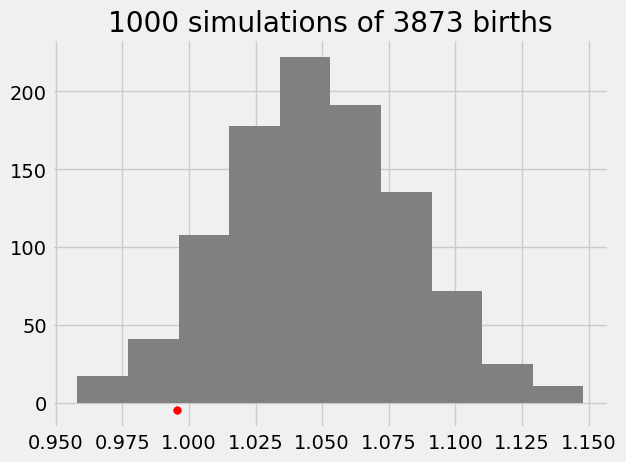

In [24]:
# All NHST starts the same way.  Assume the null hypothesis

# we now investigate the range of sample SSRs we obtain in 
# samples of 3873 births from a population with SSR=1.05

# This is as sample of 1000 binomial variates with 
# n = 3873 , p = 0.51147 (the population value) 

sim=np.random.binomial(n=3873,p=0.51147,size=1000)

plt.hist(sim/(3873-sim), color="gray")
plt.scatter(0.9953, -5, color='red', s=30)
plt.title("1000 simulations of 3873 births")
plt.savefig("ILsrs.png")

# note that savefig() will save the image to the notebook folder
# this can be useful for the project

In [25]:
# How many of our null hypothesis statistics were more extreme 
# than our Over-40-white-illinois-mothers' statistic?

In [26]:
sum(sim/(3873-sim)<0.9953)

55

In [27]:
# This is out of 1000.  59 / 1000 = 5.9%   

In [28]:
# SSR for the "Black or African American" subset
315828/307433

1.027306762774328

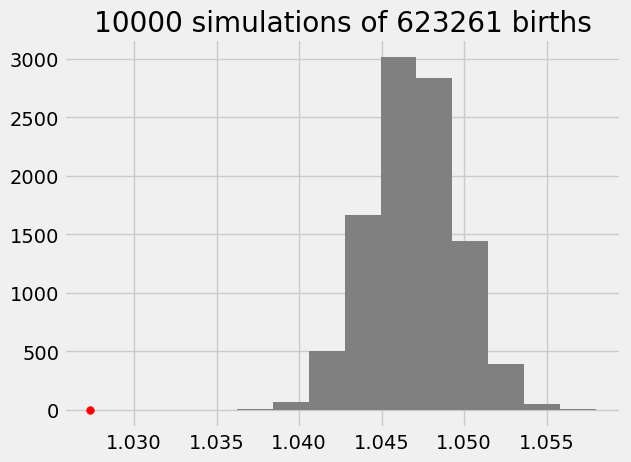

In [29]:
# recall that we observed a SSR=1.0273 in 623,261 births with African American mothers
# is there evidence for data not fitting the standard SSR model?
sim2=np.random.binomial(623261,popM,10000)

plt.hist(sim2/(623261-sim2), color="gray")
plt.scatter(1.0273, -5, color='red', s=30)
plt.title("10000 simulations of 623261 births");

In [30]:
np.sort(sim/(623261-sim))

array([0.00304973, 0.00305296, 0.0030578 , 0.0030578 , 0.00306265,
       0.00306426, 0.00307395, 0.00307556, 0.00307718, 0.00307718,
       0.00307718, 0.00307718, 0.00307718, 0.00307718, 0.00307879,
       0.0030804 , 0.0030804 , 0.00308202, 0.00308202, 0.00308363,
       0.00308686, 0.00308686, 0.00308686, 0.00308848, 0.00308848,
       0.00308848, 0.00309009, 0.00309171, 0.00309171, 0.00309171,
       0.00309171, 0.00309493, 0.00309655, 0.00309655, 0.00309816,
       0.00309816, 0.00309816, 0.00309978, 0.00309978, 0.00309978,
       0.00309978, 0.00309978, 0.00309978, 0.00310139, 0.00310301,
       0.00310301, 0.00310462, 0.00310462, 0.00310623, 0.00310623,
       0.00310623, 0.00310785, 0.00310785, 0.00310785, 0.00310785,
       0.00310946, 0.00310946, 0.00310946, 0.00311108, 0.00311108,
       0.00311108, 0.00311108, 0.00311108, 0.00311108, 0.00311108,
       0.00311269, 0.00311269, 0.00311269, 0.00311269, 0.00311431,
       0.00311431, 0.00311431, 0.00311431, 0.00311592, 0.00311

In [31]:
# Out of 10,000 simulations, not a single one has a SSR statistic below
# 1.030. 

# What does this mean??  (discuss)

### NHST p-value 

In [32]:
# Above, I used samples from the np.random.binomial function.
# This function is known; I can just get the values of it,
# its integral, and its integral's inverse:

# For the entire cohort of Black mothers in 2016:
scipy.stats.binom.cdf(n=623261,p=popM,k =315828 )


3.8945311921520355e-14

In [33]:
# For the 3873 40+ illinois white mothers in 2016: 
scipy.stats.binom.cdf(n=3873,p=popM,k =1932 )


0.05982747304531106

Interesting read on impact of p-hacking here:
https://www.npr.org/sections/thesalt/2018/09/26/651849441/cornell-food-researchers-downfall-raises-larger-questions-for-science


## Testing hypotheses using data

- Choosing between two views, called **hypotheses**, on how data were generated

- The test selects the hypothesis that is better supported by the data.

Hypotheses should be specified before doing the analysis.

**Ingredients:**
- A null hypothesis $H_0$ (e.g. SSR=1.05);
- An alternative hypothesis $H_A$ (e.g. SSR$\neq$ 1.05);
- A test statistic (in many situations associated to a model);
- A decision or a measure of significance ($\mbox{P-value}=P(E\vert H_0)$)

The decision is made using the null distribution of the test statistics (**probability distribution**); we will use an approximation given by **an empirical distribution**. P-value is about the tail area of the distribution.



## Definition of p-value
P-value captures the consistency of the data (test statistic) with the null hypothesis (distribution of the statistic under the null).

The p-value is the chance:
- under the null hypothesis
- that the test statistic 
- is equal to the observed value
- or is further in the direction of the alternative.
 
It is important to use correctly the specified alternative hypothesis for specifying the tail or tails of the null distribution of the statistic.

## On the null and the alternative hypothesis
- The procedure works if we have a way to calculate or approximate the distribution of the test statistic under one of the hypotheses 
- **Null hypothesis**:  Defines **a model** on how data was generated.
- **Alternative hypothesis**: a different model about the data generation.
- **Asymmetry** (of the two hypotheses). 



# B.  Bootstrap

In [34]:
sample = ["b"] * 1932 + ["g"] * 1941   # This is our white / 40+ / illinois sample

sample_df = pd.DataFrame({"sex":sample})
boys = np.zeros((10000,1))
for i in range(10000):
    boys[i] = sample_df.sample(3873, replace=True).value_counts()["b"]

(array([  48.,  222.,  866., 2089., 2733., 2428., 1186.,  355.,   66.,
           7.]),
 array([1826. , 1848.8, 1871.6, 1894.4, 1917.2, 1940. , 1962.8, 1985.6,
        2008.4, 2031.2, 2054. ]),
 <BarContainer object of 10 artists>)

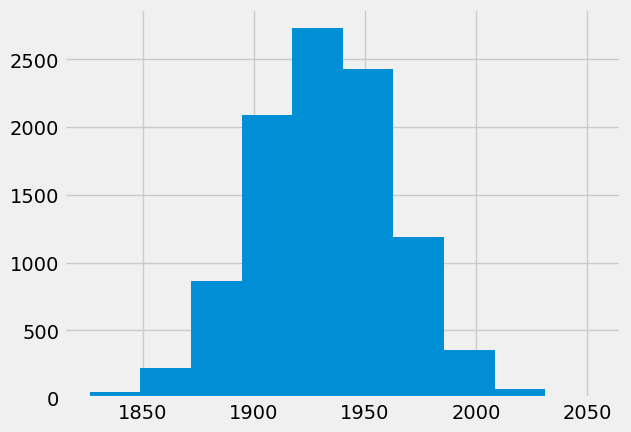

In [35]:
plt.hist(boys)

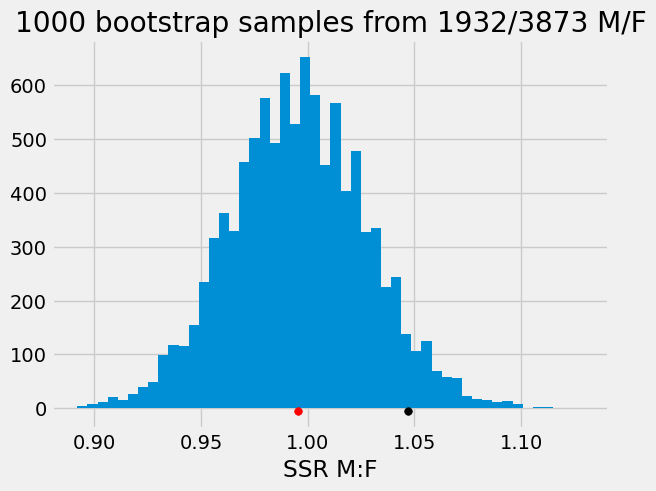

In [36]:
ssr_bootstrap = boys / (3873 - boys) 
plt.hist(ssr_bootstrap, bins=50)
plt.scatter(popM / (1-popM), -5, color='black', s=30)
plt.scatter(1932/1941, -5, color='red', s=30)

plt.title("1000 bootstrap samples from 1932/3873 M/F")
plt.xlabel("SSR M:F")
plt.savefig("ILBOOT.png")


Text(0.5, 0, 'SSR M:F')

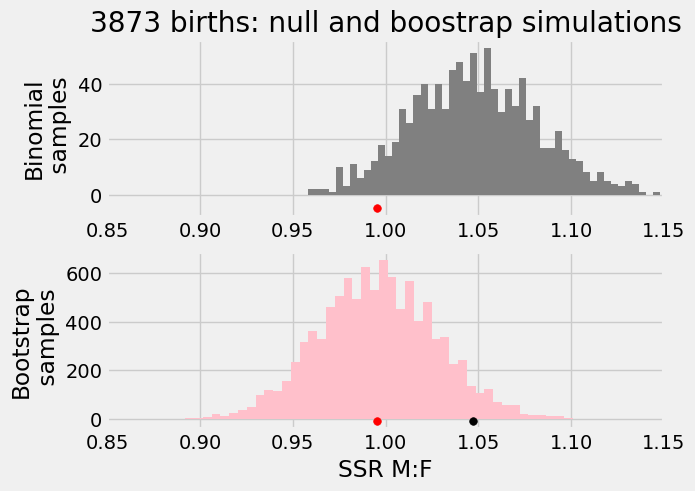

In [37]:
plt.subplot(2,1,1)
plt.hist(sim/(3873-sim), bins=50, color="gray")
plt.scatter(0.9953, -5, color='red', s=30)
plt.title("3873 births: null and boostrap simulations")
plt.xlim((0.85, 1.15))
plt.ylabel("Binomial\n samples")

plt.subplot(2,1,2)
plt.hist(ssr_bootstrap, bins=50, color="pink")
plt.scatter(popM / (1-popM), -5, color='black', s=30)
plt.scatter(1932/1941, -5, color='red', s=30)
plt.xlim((0.85, 1.15))
plt.ylabel("Bootstrap\n samples")
plt.xlabel("SSR M:F")


### Bootstrap p-value

In [38]:
# the bootstrap method gave me the freedom to find the null distribution
# of a statistic I didn't have a library function for.

# What fraction of the bootstrap samples are more extreme than the population ratio?
np.sum(ssr_bootstrap > popM / (1-popM) ) , len(ssr_bootstrap)

(569, 10000)

**Will I get the same p-value every time?**

**What can I do to reduce the uncertainty on my p-value?**

# C.  Inferring the paramter (Bayesian)


In [39]:
x = np.arange(0.47, 0.53, .0001)


In [40]:
from scipy.stats import beta
posterior_density = beta.pdf(x, 1932+1, 1941+1)

Text(0.5, 1.0, 'Bayesian density for 1932 / 3873')

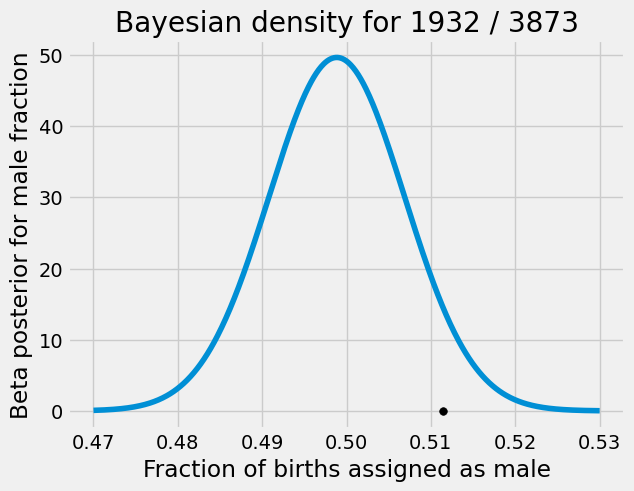

In [41]:
plt.plot(x, posterior_density)
plt.scatter(popM, 0, color='black', s=30)
plt.ylabel("Beta posterior for male fraction")
plt.xlabel("Fraction of births assigned as male")
plt.title("Bayesian density for 1932 / 3873")

In [42]:
# What fraction of this curve is under the population fraction ? 
beta.cdf ( popM,  1932+1, 1941+1) 

0.9420778051362064

In [43]:
beta.sf ( popM,  1932+1, 1941+1) 

0.057922194863793616

In [44]:
# Take score:
# NHST (binomial with pop. mean):  .060 
# Bootstrap                        .058 (randomized) 
# Bayesian  (beta posterior)       .058


### Confidence intervals?  How do we construct from 
    Probability density function (with assumed or inferred parameters)
    Samples from a distrubution or collection of bootstrap samples